### Plotting all CCBOR biweekly water sampling data

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.stats import kde
from matplotlib import cm
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [2]:
# read from csv 
biweek = pd.read_csv("/home/millieginty/Documents/git-repos/ccbor/data/biweekly/ccbor-biweekly-stolz.csv", parse_dates=['date'])

biweek.head()

,site,date,latitude,longitude,epsg3857_x,epsg3857_y,Sampling time,Watershed,Location,Samplers,...,W(mg/L),Pb(mg/L),Bi(mg/L),U(mg/L),Methane,Ethane,Ethene,Propane,Propylene,Butane
0,1,2021-08-13,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, KM, SB, JP",...,bdl,0.0002,bdl,0.0025,16,bdl,bdl,bdl,NaN,NaN
1,1,2021-09-03,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, SB",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2021-09-17,40.464786,-82.854767,-9.223350e+06,4.933715e+06,11:00:00 AM,West Branch Alum Creek,Upstream,"BL, KM",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2021-10-01,40.464786,-82.854767,-9.223350e+06,4.933715e+06,10:51:00 AM,West Branch Alum Creek,Upstream,"CH, KM, BK",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2021-10-15,40.464786,-82.854767,-9.223350e+06,4.933715e+06,10:42:00 AM,West Branch Alum Creek,Upstream,"CH, KM, CO",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Split the dataframe into site-specific dataframes

biweek1 = biweek[biweek['site'] == 1] # West Branch Alum Creek, upstream
biweek2 = biweek[biweek['site'] == 2] # West Branch Alum Creek, downstream 1
biweek3 = biweek[biweek['site'] == 3] # West Branch Alum Creek, downstream 2
biweek4 = biweek[biweek['site'] == 4] # Headwaters Alum Creek, upstream
biweek5 = biweek[biweek['site'] == 5] # Headwaters Alum Creek, downstream
biweek6 = biweek[biweek['site'] == 6] # Headwaters Alum Creek, intermediate 2
biweek7 = biweek[biweek['site'] == 7] # Headwaters Alum Creek, intermediate 1
biweek8 = biweek[biweek['site'] == 8] # Headwaters Big Walnut Creek, downstream
biweek9 = biweek[biweek['site'] == 9] # Little Walnut Creek, downstream

### Plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

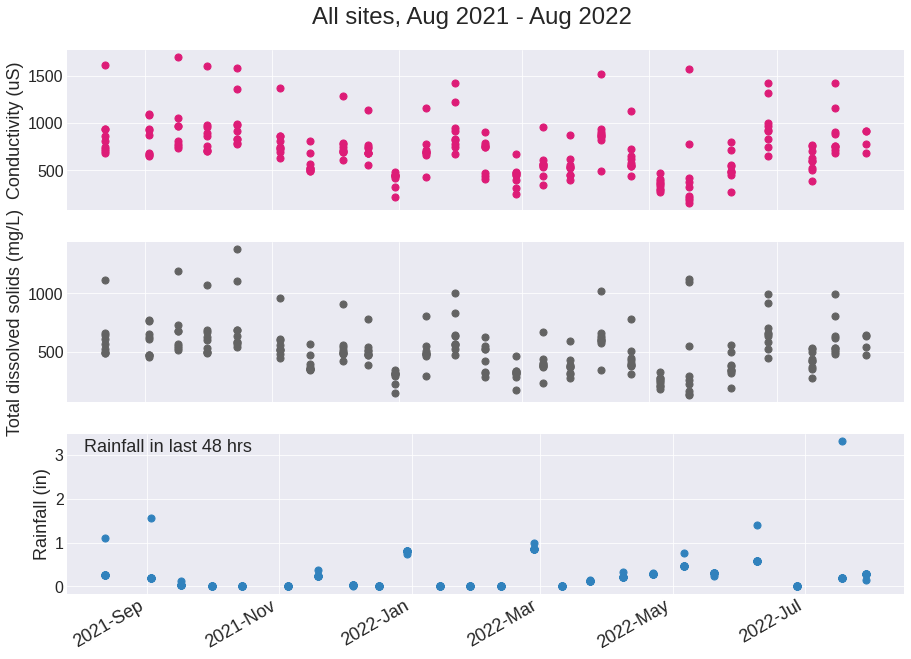

In [58]:
# plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,10))

fig2.suptitle('All sites, Aug 2021 - Aug 2022', size = BIGGER_SIZE, y = 0.94)

orig_map=plt.cm.get_cmap('coolwarm')

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

# Conductivity

biweek.plot(ax = ax1, kind='scatter', s = 50, \
            x='date', y= 'cond', c= "#dd1c77") # add in cmap = orig_map and c= biweek.temp to get temp as colors
ax1.set_ylabel('Conductivity (uS)', size = MEDIUM_SIZE)
ax1.set_xlabel('')
ax1.set(xticklabels=[])
ax1.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax1.grid(True)


# Total dissolved solids

biweek.plot(ax = ax2, kind='scatter', s = 50, \
            x='date', y= 'tds', c = "#636363")
ax2.set_ylabel('Total dissolved solids (mg/L)', size = MEDIUM_SIZE)
ax2.set_xlabel('')
ax2.set(xticklabels=[])
ax2.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)
ax2.grid(True)

# Rainfall in last 48 hrs 

biweek.plot(ax = ax3, kind='scatter', s = 50, \
            x='date', y= 'rainfall', c = "#3182bd")
ax3.set_ylabel('Rainfall (in)', size = MEDIUM_SIZE)
ax3.set_xlabel('')
ax3.set_xticklabels(biweek.date, rotation = 90, size = MEDIUM_SIZE)
ax3.tick_params(axis='y', which='major', labelsize = SMALL_SIZE)

ax = ax3
ax.set_title('Rainfall in last 48 hrs', loc='left', y=0.85, x=0.02,
             size = MEDIUM_SIZE)
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

ax3.grid(True);

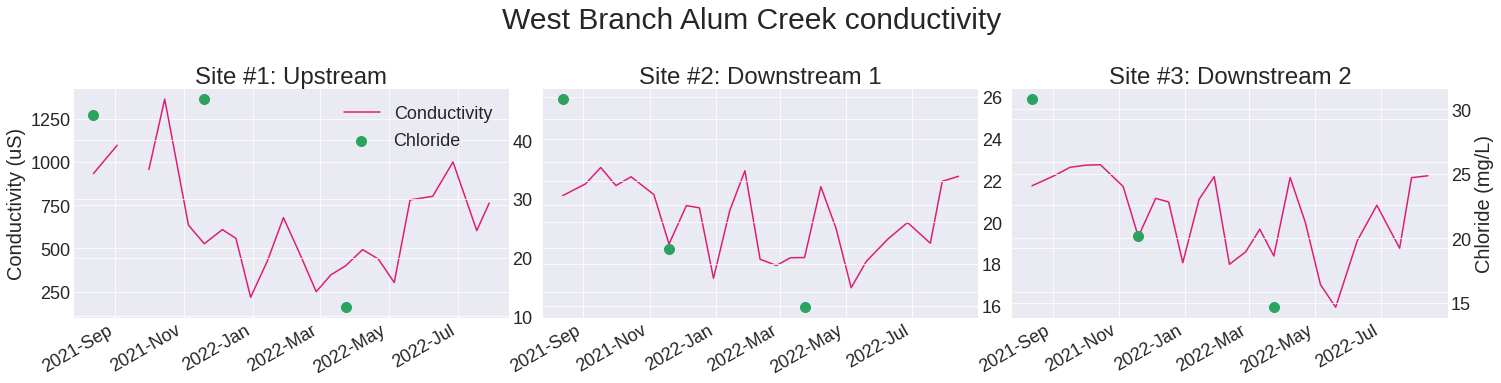

In [160]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey = True)
fig.suptitle('West Branch Alum Creek conductivity ', fontsize=30, y = 1.2)
fig.tight_layout(pad=2.08, w_pad=2)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

# Site 1
axes[0].plot(biweek1.date, biweek1.cond, c = '#dd1c77', label='Conductivity') 

ax0 = axes[0].twinx() # Add another y axis
biweek1.plot.scatter(x="date", y="Chloride", ax=ax0, c = '#2ca25f', s = 100, label='Chloride') # Add in chloride
ax0.tick_params(axis='y', labelsize=18)
#ax0.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)
ax0.set_ylabel('')
ax0.legend(loc='upper right', bbox_to_anchor=(0.925, 0.88), fontsize = SMALL_SIZE)

axes[0].set_xticklabels(biweek1.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=18)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Site #1: Upstream', size=BIGGER_SIZE)
axes[0].legend(loc='upper right', fontsize = SMALL_SIZE)

axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

# Site 2
axes[1].plot(biweek2.date, biweek2.cond, c = '#dd1c77')

ax1 = axes[1].twinx() # Add another y axis
biweek2.plot.scatter(x="date", y="Chloride", ax=ax1, c = '#2ca25f', s = 100) # Add in chloride
ax1.tick_params(axis='y', labelsize=18)
#ax1.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)
ax1.set_ylabel('')

axes[1].set_xticklabels(biweek2.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Site #2: Downstream 1', size=BIGGER_SIZE)


axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
    
# Site 3
axes[2].plot(biweek3.date, biweek3.cond, c = '#dd1c77')

ax2 = axes[2].twinx() # Add another y axis
biweek3.plot.scatter(x="date", y="Chloride", ax=ax2, c = '#2ca25f', s = 100) # Add in chloride
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)

axes[2].set_xticklabels(biweek3.date, rotation = 85, size=SMALL_SIZE)
axes[2].set_title('Site #3: Downstream 2', size=BIGGER_SIZE)

axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in axes[2].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
    
   # fig.legend(fontsize = SMALL_SIZE)
    ;

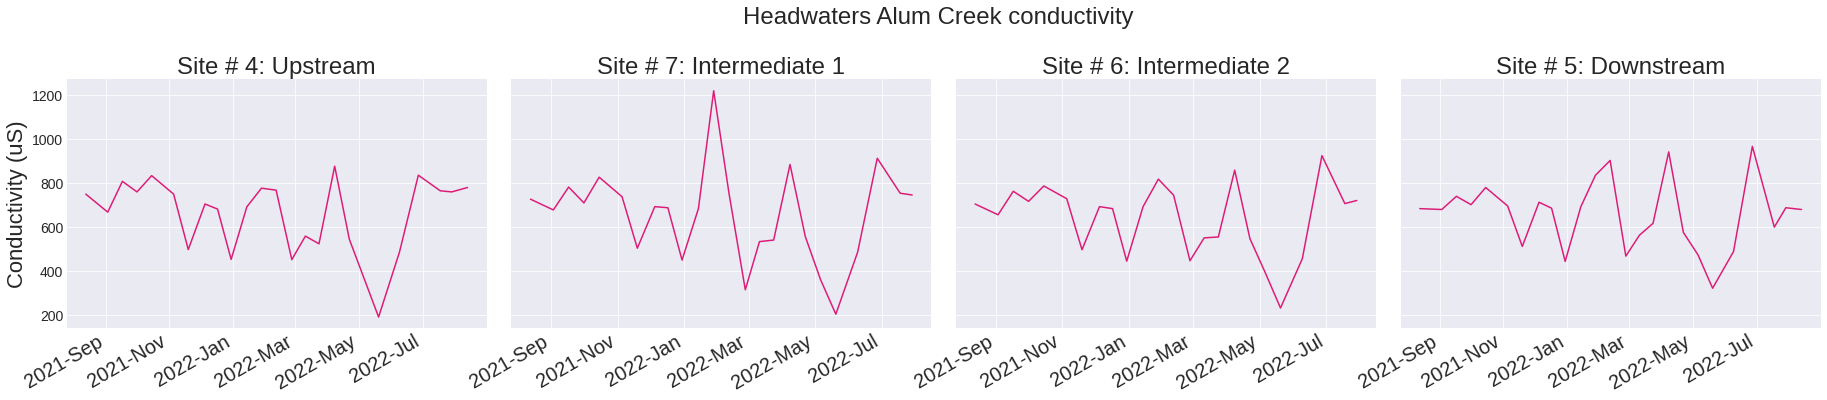

In [67]:
fig, axes = plt.subplots(1, 4, figsize=(25, 4), sharey = True)
fig.suptitle('Headwaters Alum Creek conductivity', fontsize=BIGGER_SIZE, y = 1.2)
fig.tight_layout() 

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

axes[0].plot(biweek4.date, biweek4.cond, c = '#dd1c77')
axes[0].set_xticklabels(biweek4.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Site # 4: Upstream', size=BIGGER_SIZE)

# Text in the x axis will be displayed in 'YYYY-mm' format.
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in axes[0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

axes[1].plot(biweek7.date, biweek7.cond, c = '#dd1c77')
axes[1].set_xticklabels(biweek7.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Site # 7: Intermediate 1', size=BIGGER_SIZE)

# Text in the x axis will be displayed in 'YYYY-mm' format.
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in axes[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

axes[2].plot(biweek6.date, biweek6.cond, c = '#dd1c77')
axes[2].set_xticklabels(biweek6.date, rotation = 85, size=SMALL_SIZE)
axes[2].set_title('Site # 6: Intermediate 2', size=BIGGER_SIZE)

# Text in the x axis will be displayed in 'YYYY-mm' format.
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in axes[2].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

axes[3].plot(biweek5.date, biweek5.cond, c = '#dd1c77')
axes[3].set_xticklabels(biweek5.date, rotation = 85, size=SMALL_SIZE)
axes[3].set_title('Site # 5: Downstream', size=BIGGER_SIZE)

# Text in the x axis will be displayed in 'YYYY-mm' format.
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in axes[3].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

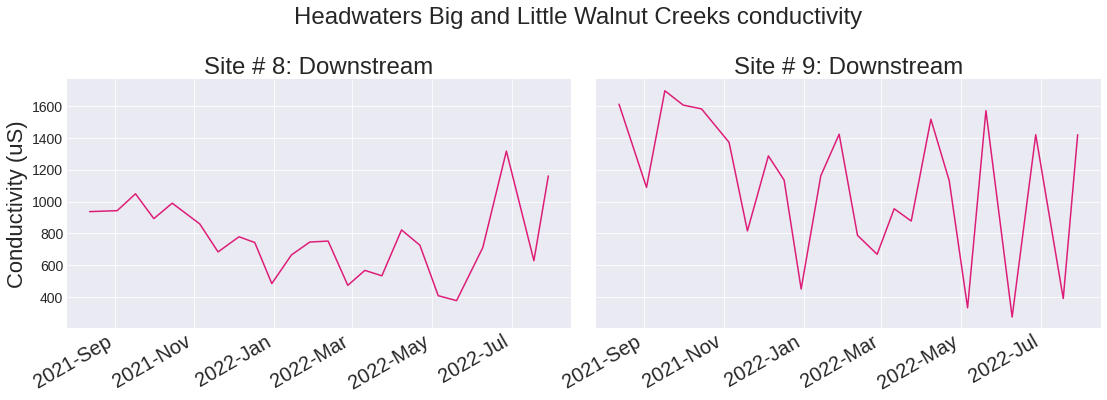

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4), sharey = True)
fig.suptitle('Headwaters Big and Little Walnut Creeks conductivity', fontsize=BIGGER_SIZE, y = 1.2)
fig.tight_layout() 

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

axes[0].plot(biweek8.date, biweek8.cond, c = '#dd1c77')
axes[0].set_xticklabels(biweek4.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Site # 8: Downstream', size=BIGGER_SIZE)

# Text in the x axis will be displayed in 'YYYY-mm' format.
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in axes[0].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

axes[1].plot(biweek9.date, biweek9.cond, c = '#dd1c77')
axes[1].set_xticklabels(biweek7.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Site # 9: Downstream', size=BIGGER_SIZE)

# Text in the x axis will be displayed in 'YYYY-mm' format.
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in axes[1].get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');